
# CNN text Classification

In this project, I used CNNs for text classification and it is based on tensorflow.


Importing Libraries

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding, Input
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras import metrics

## Word-based CNN for Text Classification

### Data

The datasetis the imdb dataset of movie reviews. These are labelled by sentiment (positive/negative).

The reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).

For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".



**Loading the data**

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


###Preprocess the text data

In this particular case, where I am using the imdb dataset there is no need to do all the traditional preprocessings that is normally done when dealing with NLP problems. Part of them are already done at this point.


**Preprocessing and padding**

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 1000
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 1000)
x_test shape: (25000, 1000)


**Creating the model**

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

# Set parameters
max_features = 10000
maxlen = 1000
batch_size = 64
embedding_dims = 100
filters = 128
ks = [3, 5, 5] # kernel_size
hidden_dims = 128
epochs = 10

def get_cnn_model_v1():
    # Create the model, no layers yet
    model = Sequential()
    # Add the layers
    # Add an embedding layer which maps our vocab indices (max_features) into embedding_dims dimensions
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))


    # dropout layer
    model.add(Dropout(0.4))

     # Add a Convolution1D layer, with 128 filters, kernel size ks[0], padding same, activation relu and stride 1
    model.add(Conv1D(128,
                     ks[0],
                     padding='valid',
                     activation='relu',
                     strides=1))
    # Use max pooling after the CONV layer
    model.add(MaxPooling1D(2))
    #  Add a CONV layer, similar in properties to what we have above (3.2.3.) and kernel size 5
    model.add(Conv1D(128,
                     5,
                     padding='valid',
                     activation='relu',
                     strides=1))
    #  Add a Batch Normalization layer in order to reduce overfitting
    #model.add(BatchNormalization())
    #  Use max pooling again
    model.add(MaxPooling1D(2))
    #  Add a flatten layer
    model.add(Flatten())
    #  Add a dense layer with hidden_dims hidden units and activation relu
    model.add(Dense(128, activation='relu'))
    #  Add a dropout layer with a dropout probability of 0.5
    model.add(Dropout(0.5))
    #  We project onto a single unit output layer, and squash it with a sigmoid
    model.add(Dense(1, activation='sigmoid'))
    ##################################################################################

    #  Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()

    return model

### Evaluating the model



In [ ]:
# Evaluate the accuracy and loss on the training set
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))

# Evaluate the accuracy and loss on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

**Model Evaluation**

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Calling the function to get the model
model = get_cnn_model_v1()

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to a fixed length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Evaluate the accuracy and loss on the training set
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))

# Evaluate the accuracy and loss on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 dropout (Dropout)           (None, 1000, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, 998, 128)          38528     
                                                                 
 max_pooling1d (MaxPooling1  (None, 499, 128)          0         
 D)                                                              
                                                                 
 conv1d_5 (Conv1D)           (None, 495, 128)          82048     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 247, 128)          0         
 g1D)                                                 

**Comment:** In this part of our code the accuracy is showing very low for both training and testing. I assume it is due to the fact that I have not completed multiple epochs for this part. But in visualization part for my model, it can be seen that the accuracy went upto 0.98

### Visualize accuracy

The following plots show the learning curves during training/test in terms of accuracy and loss.


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [ ]:
%matplotlib inline
plot_history(history)

**Vizualizing**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 dropout_10 (Dropout)        (None, 1000, 100)         0         
                                                                 
 conv1d_10 (Conv1D)          (None, 998, 128)          38528     
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 499, 128)          0         
 ng1D)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 495, 128)          82048     
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 247, 128)          0         
 ng1D)                                                

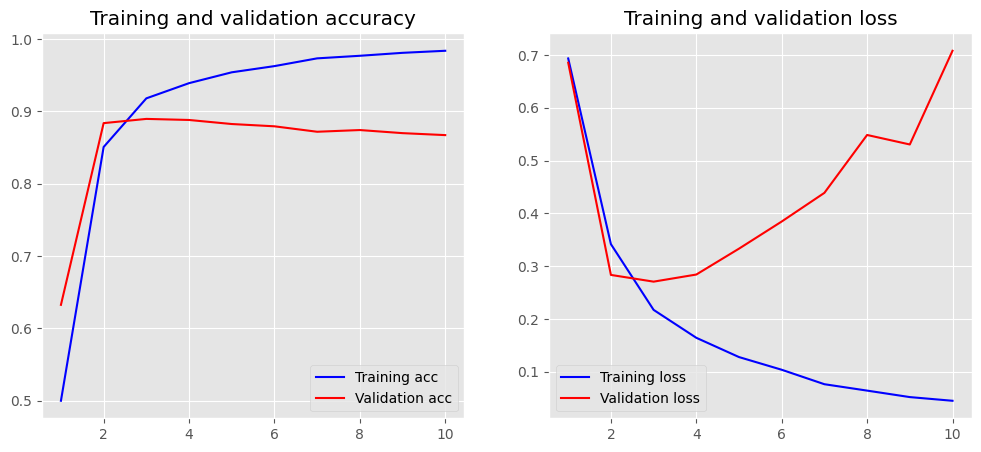

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']  # Access with 'accuracy'
    val_acc = history.history['val_accuracy']  # Access with 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=5000)


maxlen = 1000
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)

model = get_cnn_model_v1()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

%matplotlib inline
plot_history(history)

**Saving the model**

In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


model = Sequential()


model.add(Embedding(10000, 128, input_length=100))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))


model.save('my_model.keras')


loaded_model = load_model('my_model.keras')

## Character-based CNN for Text Classification



In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding, Input
from keras.layers import Conv1D, MaxPooling1D
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

Importing from correct module

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding, Input
from keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical # Imported from the correct module
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

**Restoring sting**

In [ ]:
def map_ids_to_words():

    # Get word indexes from the imdb dataset
    word_to_id = imdb.get_word_index()

    # Shift with 3 (value + 3) the indexes in word_to_id
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}

    # Indexes 0-3 are now taken by the following special characters: "<PAD>", "<START>", "<UNK>", "<UNUSED>".
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3

    # Reverse the roles in word_to_id (now the values become keys)
    id_to_word = {value:key for key,value in word_to_id.items()}

    return id_to_word


def restore_text_data(dataset):

    str_data = []

    #  Get the corresponding words for the ids in the dataset.
    id_to_word = map_ids_to_words()

    # For each sample in the dataset, perform the conversion to string
    for i in range(len(dataset)):
        str_sample = ' '.join([id_to_word.get(id, '') for id in dataset[i]])
        str_data.append(str_sample)

    return str_data

    #  Load the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000, index_from=3)

#  Restore text data for both training and test
X_train_str = restore_text_data(x_train)
X_test_str = restore_text_data(x_test)

1641221/1641221 [==============================] - 1s 1us/step


**Getting vocabulary and Creating tokenizer**

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer



def get_vocabulary(X_train_str):

    txt = ''
    for document in X_train_str:
        for char in document:
            txt += char
    return set(txt)


def create_tokenizer(X_train_str, chars):

    # Initialize the Tokenizer
    tk = Tokenizer(char_level=True, oov_token='UNK')

    #  Fit the tokenizer on the training data
    tk.fit_on_texts(X_train_str)

    #  Build a character dictionary based on our alphabet (chars)
    char_dict = {}
    for i, char in enumerate(chars):
        char_dict[char] = i

    return tk

**Conversions**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



def preprocess_dataset(dataset, tk):

    # Convert string to index
    sequences = tk.texts_to_sequences(dataset)

    #  Padding

    proc_data = pad_sequences(sequences, maxlen=1024)

    #  Convert to numpy array
    proc_data = np.array(proc_data)

    return proc_data

chars = get_vocabulary(X_train_str)
tk = create_tokenizer(X_train_str, chars)

train_data = preprocess_dataset(X_train_str, tk)
test_data = preprocess_dataset(X_test_str, tk)

vocab_size = len(tk.word_index)

print("vocabulary: ", tk.word_index)
print("vocabulary size: ", vocab_size)

vocabulary:  {'UNK': 1, ' ': 2, 'e': 3, 't': 4, 'n': 5, 'a': 6, 'o': 7, 'i': 8, 's': 9, 'h': 10, 'r': 11, 'u': 12, 'l': 13, 'k': 14, 'd': 15, '<': 16, '>': 17, 'm': 18, 'c': 19, 'f': 20, 'w': 21, 'y': 22, 'b': 23, 'g': 24, 'p': 25, 'v': 26, "'": 27, 'j': 28, 'x': 29, '0': 30, 'q': 31, '1': 32, 'z': 33, '2': 34, '9': 35, '3': 36, '5': 37, '8': 38, '4': 39, '7': 40, '6': 41, '\x96': 42, 'é': 43}
vocabulary size:  43


In [ ]:
y_train = to_categorical(y_train)


In [ ]:
y_test = to_categorical(y_test)


**Loading the embedded weights**

In [ ]:
def load_embedding_weights(tk, vocab_size):

    embedding_weights = [] #(51, 50)

    #  Append zero vector to represent the PAD
    embedding_weights.append(np.zeros(embedding_size))

    #  One-hot repres of the characters
    for char, i in tk.word_index.items():
        onehot = np.zeros(embedding_size)
        onehot[i-1] = 1
        embedding_weights.append(onehot)

    # Convert to a numpy array
    embedding_weights = np.array(embedding_weights)

    return embedding_weights

**Creating model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import numpy as np # Import numpy for array operations

input_size = 1024
embedding_size = 50
num_of_classes = 2
dropout_p = 0.5
optimizer = 'adam'
loss = "binary_crossentropy"

# Modified conv_layers - dilation rate should be positive integers
conv_layers = [[128, 7, 3], [128, 5, 1], [128, 3, 1], [128, 3, 3]]

# Assuming 'tk' is your tokenizer, replace with the actual variable name
vocab_size = len(tk.word_index)

# Call the function to generate embedding weights
embedding_matrix = load_embedding_weights(tk, vocab_size)

def build_model_2():
    # Instantiate the model
    model = keras.Sequential()

    # Add an Embedding layer
    model.add(Embedding(vocab_size+1, embedding_size, input_length=input_size, weights=[embedding_matrix], trainable=False))

    #Add Convolutional layers
    for num_filters, filter_size, dilation_rate in conv_layers:
        model.add(Conv1D(num_filters, filter_size, activation='relu', dilation_rate=dilation_rate, padding='same'))

    # Add a Global Max Pooling layer
    model.add(GlobalMaxPooling1D())

    # Add a Dense layer for classification
    model.add(Dense(num_of_classes, activation='softmax'))

    #  Compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

# Build and summarize the model
model = build_model_2()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1024, 50)          2200      
                                                                 
 conv1d (Conv1D)             (None, 1024, 128)         44928     
                                                                 
 conv1d_1 (Conv1D)           (None, 1024, 128)         82048     
                                                                 
 conv1d_2 (Conv1D)           (None, 1024, 128)         49280     
                                                                 
 conv1d_3 (Conv1D)           (None, 1024, 128)         49280     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                        

### Train the model

I have experimented with batch size 128, 10 epochs and the train and validation (test_data) as parameters. Verbose should be 1 in order to follow how the training progresses.

**Training the model**

In [ ]:
from sklearn.model_selection import train_test_split



history2 = model.fit(train_data, y_train, epochs=10, validation_data=(test_data, y_test))


Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 1000), found shape=(None, 1024)


### Evaluate the model



**Accuracy**

In [ ]:
# Evaluate the accuracy and loss on the training set
loss, accuracy = model.evaluate(train_data, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

#  Evaluate the accuracy and loss on the test set
loss, accuracy = model.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9846
Testing Accuracy:  0.7956


**Plotting accuracy**

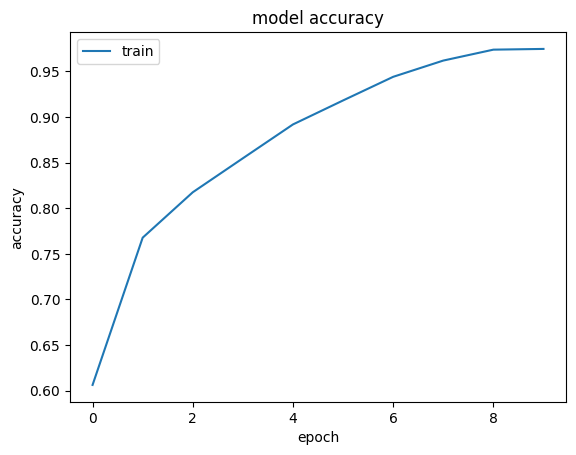

In [ ]:
# Plot the learning curves
%matplotlib inline

def plot_history(history):

  import matplotlib.pyplot as plt
  plt.plot(history.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

plot_history(history2)